In [1]:
import datetime as dt
import math
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
import scipy.interpolate
import matplotlib.pyplot as plt

# Define the bond data manually
data = {
    "Bond Name": [
        "CAN 1.25 Mar 25", "CAN 0.5 Sep 25", "CAN 0.25 Mar 26", "CAN 1.0 Sep 26",
        "CAN 1.25 Mar 27", "CAN 2.75 Sep 27", "CAN 3.25 Sep 28", "CAN 4.0 Mar 29",
        "CAN 3.5 Mar 28", "CAN 3.5 Sep 29"
    ],
    "ISIN": [
        "CA135087K528", "CA135087K940", "CA135087L518", "CA135087L930",
        "CA135087M847", "CA135087N837", "CA135087Q491", "CA135087Q988",
        "CA135087P576", "CA135087R895"
    ],
    "Issue Date": [
        "10/11/2019", "4/3/2020", "10/9/2020", "4/16/2021", "10/15/2021",
        "5/13/2022", "4/21/2023", "10/13/2023", "10/21/2022", "4/8/2024"
    ],
    "Maturity Date": [
        "3/1/2025", "9/1/2025", "3/1/2026", "9/1/2026", "3/1/2027",
        "9/1/2027", "9/1/2028", "3/1/2029", "3/1/2028", "9/1/2029"
    ],
    "Coupon": [
        "1.250%", "0.500%", "0.250%", "1.000%", "1.250%",
        "2.750%", "3.25%", "4.00%", "3.50%", "3.50%"
    ],
    "Jan 6": [99.73, 98.4, 96.99, 97.01, 96.62, 99.63, 101.1, 104.07, 101.82, 102.22],
    "Jan 7": [99.73, 98.4, 96.98, 96.99, 96.59, 99.56, 101.14, 104.01, 101.82, 102.14],
    "Jan 8": [99.74, 98.4, 96.97, 97.00, 96.58, 99.54, 100.99, 103.9, 101.7, 102.04],
    "Jan 9": [99.73, 98.42, 97.00, 97.03, 96.63, 99.58, 100.94, 103.87, 101.72, 101.98],
    "Jan 10": [99.74, 98.37, 96.90, 96.86, 96.39, 99.27, 100.79, 103.53, 101.52, 101.69],
    "Jan 13": [99.73, 98.36, 96.84, 96.77, 96.28, 99.13, 100.49, 103.29, 101.26, 101.28],
    "Jan 14": [99.73, 98.36, 96.80, 96.71, 96.19, 99.02, 100.19, 102.99, 101.02, 101.00],
    "Jan 15": [99.77, 98.4, 96.90, 96.85, 96.36, 99.2, 100.42, 103.24, 101.24, 101.27],
    "Jan 16": [99.78, 98.47, 97.01, 97.03, 96.60, 99.5, 100.92, 103.8, 101.58, 101.85],
    "Jan 17": [99.80, 98.5, 97.06, 97.07, 96.64, 99.53, 101.02, 103.9, 101.65, 101.97]
}

# Create a DataFrame
bonds = pd.DataFrame(data)

# Ensure "Maturity Date" is in datetime format
bonds["Maturity Date"] = pd.to_datetime(bonds["Maturity Date"], errors='coerce')

# Display the DataFrame
print(bonds)


         Bond Name          ISIN  Issue Date Maturity Date  Coupon   Jan 6  \
0  CAN 1.25 Mar 25  CA135087K528  10/11/2019    2025-03-01  1.250%   99.73   
1   CAN 0.5 Sep 25  CA135087K940    4/3/2020    2025-09-01  0.500%   98.40   
2  CAN 0.25 Mar 26  CA135087L518   10/9/2020    2026-03-01  0.250%   96.99   
3   CAN 1.0 Sep 26  CA135087L930   4/16/2021    2026-09-01  1.000%   97.01   
4  CAN 1.25 Mar 27  CA135087M847  10/15/2021    2027-03-01  1.250%   96.62   
5  CAN 2.75 Sep 27  CA135087N837   5/13/2022    2027-09-01  2.750%   99.63   
6  CAN 3.25 Sep 28  CA135087Q491   4/21/2023    2028-09-01   3.25%  101.10   
7   CAN 4.0 Mar 29  CA135087Q988  10/13/2023    2029-03-01   4.00%  104.07   
8   CAN 3.5 Mar 28  CA135087P576  10/21/2022    2028-03-01   3.50%  101.82   
9   CAN 3.5 Sep 29  CA135087R895    4/8/2024    2029-09-01   3.50%  102.22   

    Jan 7   Jan 8   Jan 9  Jan 10  Jan 13  Jan 14  Jan 15  Jan 16  Jan 17  
0   99.73   99.74   99.73   99.74   99.73   99.73   99.77   99.78

In [ ]:
ttm_all = np.zeros(bonds.shape[0])
periods_all = np.zeros(bonds.shape[0])

for i in range(bonds.shape[0]):
    maturity = bonds.loc[i, "Maturity Date"]
    date_delta = relativedelta(maturity, dt.datetime(2025,2,2))
    ttm_i = date_delta.years + date_delta.months/12 + date_delta.days/365
    ttm_all[i] = ttm_i
    period_i = round((ttm_i + 0.5) * 2) / 2
    periods_all[i] = int(period_i * 2)

bonds['ttm'] = ttm_all
bonds['periods'] = periods_all
print(bonds)

         Bond Name          ISIN  Issue Date Maturity Date  Coupon   Jan 6   Jan 7   Jan 8   Jan 9  Jan 10  Jan 13  Jan 14  Jan 15  Jan 16  Jan 17       ttm  periods
0  CAN 1.25 Mar 25  CA135087K528  10/11/2019    2025-03-01  1.250%   99.73   99.73   99.74   99.73   99.74   99.73   99.73   99.77   99.78   99.80  0.073973      1.0
1   CAN 0.5 Sep 25  CA135087K940    4/3/2020    2025-09-01  0.500%   98.40   98.40   98.40   98.42   98.37   98.36   98.36   98.40   98.47   98.50  0.582192      2.0
2  CAN 0.25 Mar 26  CA135087L518   10/9/2020    2026-03-01  0.250%   96.99   96.98   96.97   97.00   96.90   96.84   96.80   96.90   97.01   97.06  1.073973      3.0
3   CAN 1.0 Sep 26  CA135087L930   4/16/2021    2026-09-01  1.000%   97.01   96.99   97.00   97.03   96.86   96.77   96.71   96.85   97.03   97.07  1.582192      4.0
4  CAN 1.25 Mar 27  CA135087M847  10/15/2021    2027-03-01  1.250%   96.62   96.59   96.58   96.63   96.39   96.28   96.19   96.36   96.60   96.64  2.073973      5.0
5  C

In [ ]:
def get_price(coupon, ytm, ttm, periods, face_value=100):
    price = 0
    for i in range(1, int(periods)):
        ti = ttm - 0.5 * i
        price += coupon * math.exp(-ytm * ti)
    price += (coupon + face_value) * math.exp(-ytm * ttm)
    return price

def get_ytm(curr_price, coupon, ttm, periods, face_value=100):
    ytm = coupon / 100
    flag = True
    while flag:
        if curr_price < face_value:
            ytm += 0.000001
        else:
            ytm -= 0.000001

        price = get_price(coupon, ytm, ttm, periods)

        if curr_price < face_value:
            flag = price > curr_price
        else:
            flag = price < curr_price

    return ytm * 100

In [ ]:
dates = ['Jan 6', 'Jan 7', 'Jan 8', 'Jan 9', 'Jan 10', 'Jan 13', 'Jan 14', 'Jan 15', 'Jan 16', 'Jan 17']


ytm_dict = {}
for k1 in bonds.index:
    ytm_dict[k1] = {}
    for d in dates:
        ytm_dict[k1][d] = None


for i in range(len(dates)):
    date = dates[i]
    day_s = bonds.loc[:, date]

    for j in range(len(day_s)):
        bond_j = day_s.index[j]
        close = day_s[j]
        periods = bonds.loc[bond_j, 'periods']
        coupon = float(bonds.loc[bond_j, 'Coupon'].replace('%','')) / 2
        ttm = bonds.loc[bond_j, 'ttm']

        ytm_day = get_ytm(close, coupon, ttm, periods)
        ytm_dict[bond_j][date] = ytm_day

bonds_ytm = pd.DataFrame.from_dict(ytm_dict)
bonds_ytm = bonds_ytm.T
print(bonds_ytm)

     Jan 6    Jan 7    Jan 8    Jan 9   Jan 10   Jan 13   Jan 14   Jan 15   Jan 16   Jan 17
0  12.0778  12.0778  11.9422  12.0778  11.9422  12.0778  12.0778  11.5357  11.4002  11.1292
1   3.6350   3.6350   3.6350   3.6000   3.6875   3.7050   3.7050   3.6350   3.5126   3.4602
2   3.1999   3.2096   3.2192   3.1903   3.2865   3.3443   3.3828   3.2865   3.1807   3.1326
3   3.2006   3.2137   3.2071   3.1874   3.2993   3.3586   3.3982   3.3059   3.1874   3.1611
4   3.1894   3.2046   3.2096   3.1843   3.3061   3.3620   3.4078   3.3213   3.1995   3.1792
5   3.3405   3.3688   3.3769   3.3607   3.4864   3.5433   3.5880   3.5148   3.3931   3.3810
6   1.7499   1.7499   1.7499   1.7499   1.7499   1.7499   1.7499   1.7499   1.7499   1.7499
7   1.6249   1.6249   1.6249   1.6249   1.6249   1.6249   1.6249   1.6249   1.6249   1.6249
8   1.9999   1.9999   1.9999   1.9999   1.9999   1.9999   1.9999   1.9999   1.9999   1.9999
9   1.7499   1.7499   1.7499   1.7499   1.7499   1.7499   1.7499   1.7499   1.74

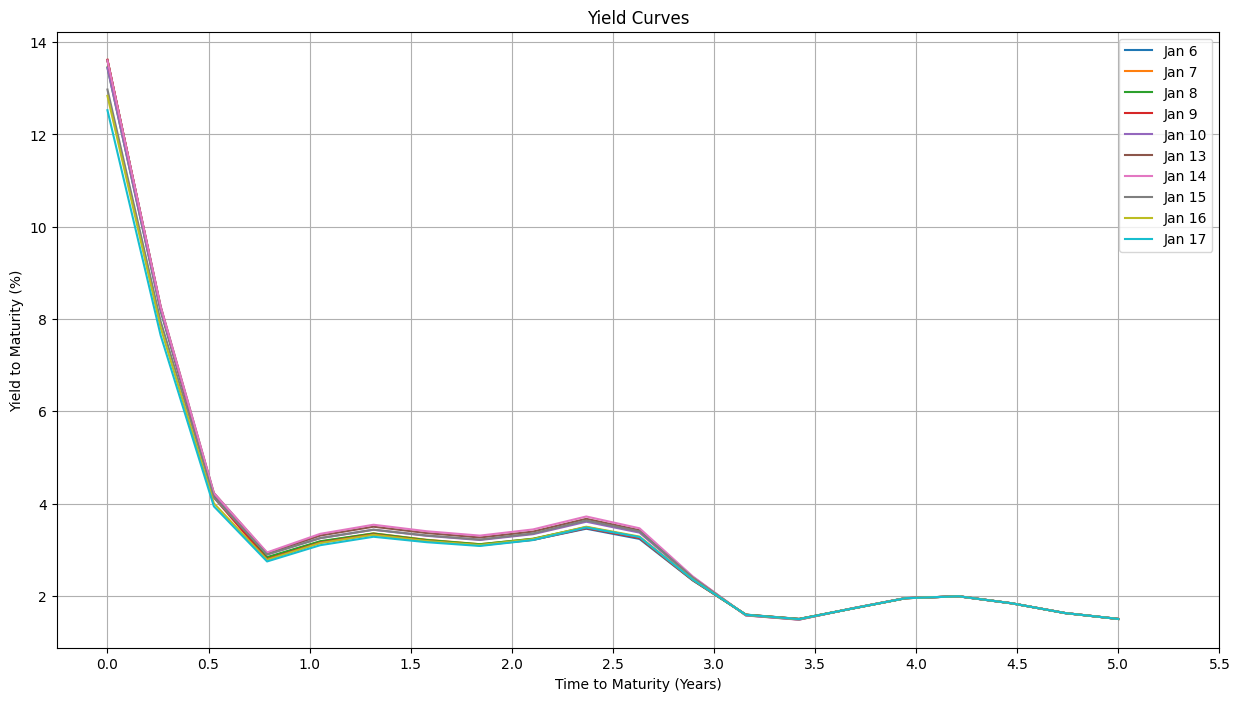

In [ ]:
all_ytm = []
X = np.linspace(0, 5, 20)


sorted_indices = np.argsort(bonds['ttm'].values)
x_sorted = bonds['ttm'].values[sorted_indices]

for d in bonds_ytm:
    y_sorted = bonds_ytm[d].values[sorted_indices]
    cs = scipy.interpolate.CubicSpline(x_sorted, y_sorted, bc_type='natural')
    all_ytm.append(cs(X))

plt.figure(figsize=(15,8))
for i in range(len(dates)):
    plt.plot(X, all_ytm[i], label=dates[i])

plt.title('Yield Curves')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Yield to Maturity (%)')
plt.xticks(np.arange(0, 6, 0.5))
plt.grid()
plt.legend()
plt.show()


Initial bonds_spot (base bond spot rate set):
                    Jan 6     Jan 7     Jan 8     Jan 9    Jan 10    Jan 13    Jan 14    Jan 15    Jan 16    Jan 17
CAN 1.25 Mar 25  0.120778  0.120778  0.119422  0.120778  0.119422  0.120778  0.120778  0.115357  0.114002  0.111292
CAN 0.5 Sep 25       None      None      None      None      None      None      None      None      None      None
CAN 0.25 Mar 26      None      None      None      None      None      None      None      None      None      None
CAN 1.0 Sep 26       None      None      None      None      None      None      None      None      None      None
CAN 1.25 Mar 27      None      None      None      None      None      None      None      None      None      None
CAN 2.75 Sep 27      None      None      None      None      None      None      None      None      None      None
CAN 3.5 Mar 28       None      None      None      None      None      None      None      None      None      None
CAN 3.25 Sep 28      None 

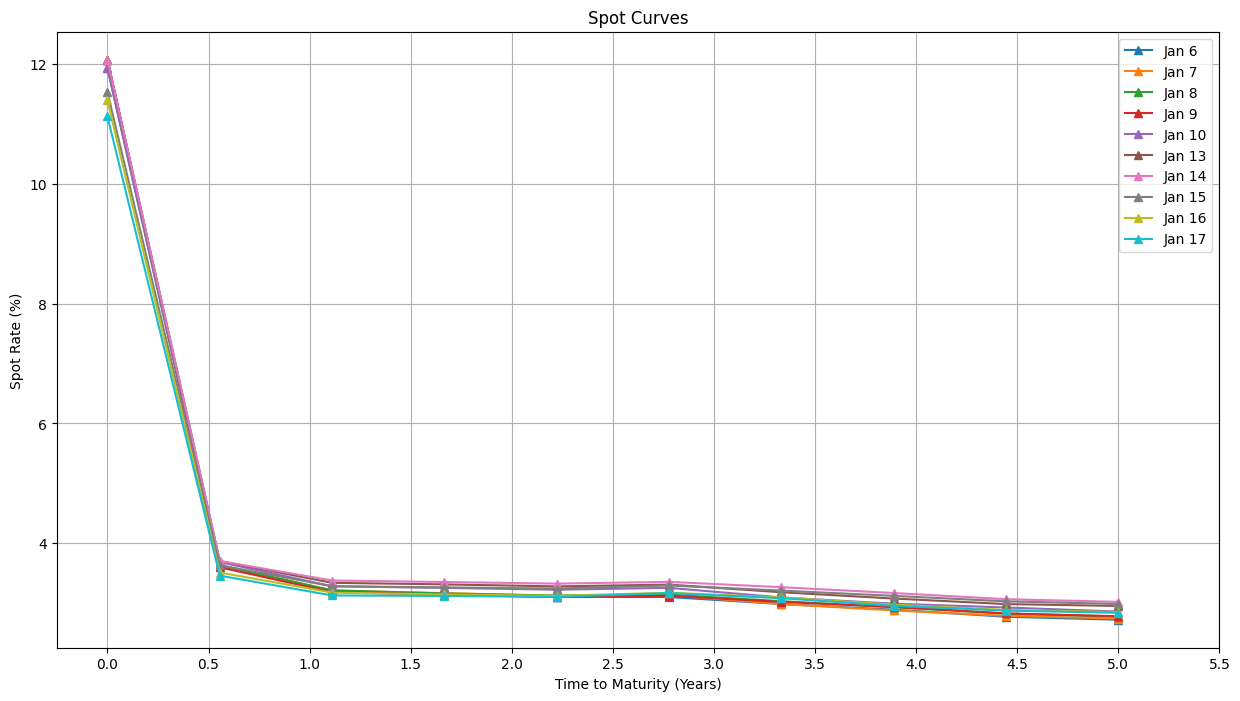

In [ ]:


# --------------------------------------------------------------------------------
# Assumptions:
# 1. The variable 'bonds' is already defined from previous steps and contains:
#    - 'Bond Name', 'Maturity Date', 'Coupon' (as string), various trading day price columns, etc.
# 2. The variable 'ytm_dict' is defined and contains each bond's yield-to-maturity for each trading day (in percentage).
# --------------------------------------------------------------------------------

# -----------------------------
# 1. Sort the bonds by time-to-maturity (ttm) in ascending order
# -----------------------------
bonds = bonds.sort_values('ttm').reset_index(drop=True)

# -----------------------------
# Define the list of trading dates (should match the column names in the DataFrame)
# -----------------------------
dates = ['Jan 6', 'Jan 7', 'Jan 8', 'Jan 9', 'Jan 10', 'Jan 13', 'Jan 14', 'Jan 15', 'Jan 16', 'Jan 17']

# -----------------------------
# 2. Initialize spot_dict: keys are bond names and values are dictionaries with spot rates for each date (initially None)
# -----------------------------
spot_dict = {}
for k1 in bonds['Bond Name']: # Using bond names as keys
    spot_dict[k1] = {}
    for d in dates:
        spot_dict[k1][d] = None

# -----------------------------
# 3. For each trading day, set the spot rate for the shortest maturity bond (the first bond after sorting)
#    directly as its yield-to-maturity (converted to a decimal)
# -----------------------------
for i in range(len(dates)):
    date = dates[i]
    bond_index = bonds.index[bonds['Bond Name'] == b][0]

    s1 = ytm_dict[bond_index][date] / 100 # Access using index
    spot_dict[b][date] = s1

# Create a DataFrame from spot_dict and transpose it so that bond names become the row index
bonds_spot = pd.DataFrame.from_dict(spot_dict)
bonds_spot = bonds_spot.T
print("Initial bonds_spot (base bond spot rate set):")
print(bonds_spot)

# -----------------------------
# 4. Bootstrapping: Calculate the spot rate for the remaining bonds for each trading day in order of increasing ttm
# -----------------------------
for d in range(len(dates)):
    date = dates[d]
    # Retrieve the current trading day's spot rates for all bonds (the order should match that in bonds)
    day_s = bonds_spot.loc[:, date]

    # Start calculating the spot rate from the second bond (n starts at 1)
    for n in range(1, len(day_s)):
        b_n = day_s.index[n]  # Current bond name

        # Convert the Coupon string to a float and compute the semiannual coupon payment
        pi = float(bonds.loc[bonds['Bond Name'] == b_n, 'Coupon'].values[0].replace('%','')) / 2
        pn = 100 + pi  # Payment at maturity (final coupon plus principal)
        P = bonds.loc[bonds['Bond Name'] == b_n, date].values[0]  # Current trading day's price
        ttm = bonds.loc[bonds['Bond Name'] == b_n, 'ttm'].values[0]  # Time to maturity (in years)

        prevSum = 0
        # For each of the previous coupon cash flows, discount using the already determined spot rates.
        # (Here, following the sample code, we simplify by using the base bond's spot rate for discounting, i.e., r_ti = bonds_spot.iloc[0][date])
        for i in range(n):
            ti = ttm - 0.5 * (n - i)
            r_ti = bonds_spot.iloc[0][date]
            prevSum += pi * math.exp(-r_ti * ti)

        # Using the formula: P = prevSum + (pn)*exp(-s*ttm)
        # Solve for s: s = [ln(pn) - ln(P - prevSum)] / ttm
        s_day = (np.log(pn) - np.log(P - prevSum)) / ttm

        bonds_spot.at[b_n, date] = s_day

# Convert the spot rates to percentage form
bonds_spot = bonds_spot * 100
print("Bonds_spot after bootstrapping:")
print(bonds_spot)

# -----------------------------
# 5. Plot the 5-year spot curves (overlaying curves for each trading day)
# -----------------------------
X = np.linspace(0, 5, 10)  # Time points (in years) for the spot curve
plt.figure(figsize=(15,8))

for i in range(len(dates)):
    plt.plot(X, bonds_spot.iloc[:, i].values, label=dates[i], marker='^')

plt.title('Spot Curves')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Spot Rate (%)')
plt.xticks(np.arange(0, 6, 0.5))
plt.grid()
plt.legend()
plt.show()


Initial bonds_forwards:
                    Jan 6     Jan 7     Jan 8     Jan 9    Jan 10    Jan 13    Jan 14    Jan 15    Jan 16    Jan 17
CAN 1.25 Mar 25   12.0778   12.0778   11.9422   12.0778   11.9422   12.0778   12.0778   11.5357   11.4002   11.1292
CAN 0.5 Sep 25   3.631962  3.631962  3.632011  3.596966  3.684518  3.701976  3.701976  3.632155  3.509749  3.457391
CAN 0.25 Mar 26   3.19323  3.202854  3.212579  3.183606  3.279986  3.337702  3.376266  3.280284   3.17448  3.126581
CAN 1.0 Sep 26   3.152509  3.165731  3.159825  3.139289  3.252451  3.311361  3.351137  3.261197  3.142823  3.117809
CAN 1.25 Mar 27  3.103799  3.119132  3.125482  3.098689  3.222719  3.277863  3.324044  3.241821  3.120223  3.102273
CAN 2.75 Sep 27  3.100458  3.129439  3.141203  3.121157  3.253224  3.307942  3.353738  3.292832  3.171765  3.166365
CAN 3.25 Sep 28  2.888647  2.876464  2.927909  2.937432   2.98899    3.0751  3.167257   3.11974  2.972377  2.953486
CAN 4.0 Mar 29   2.771308  2.787477  2.825067  2

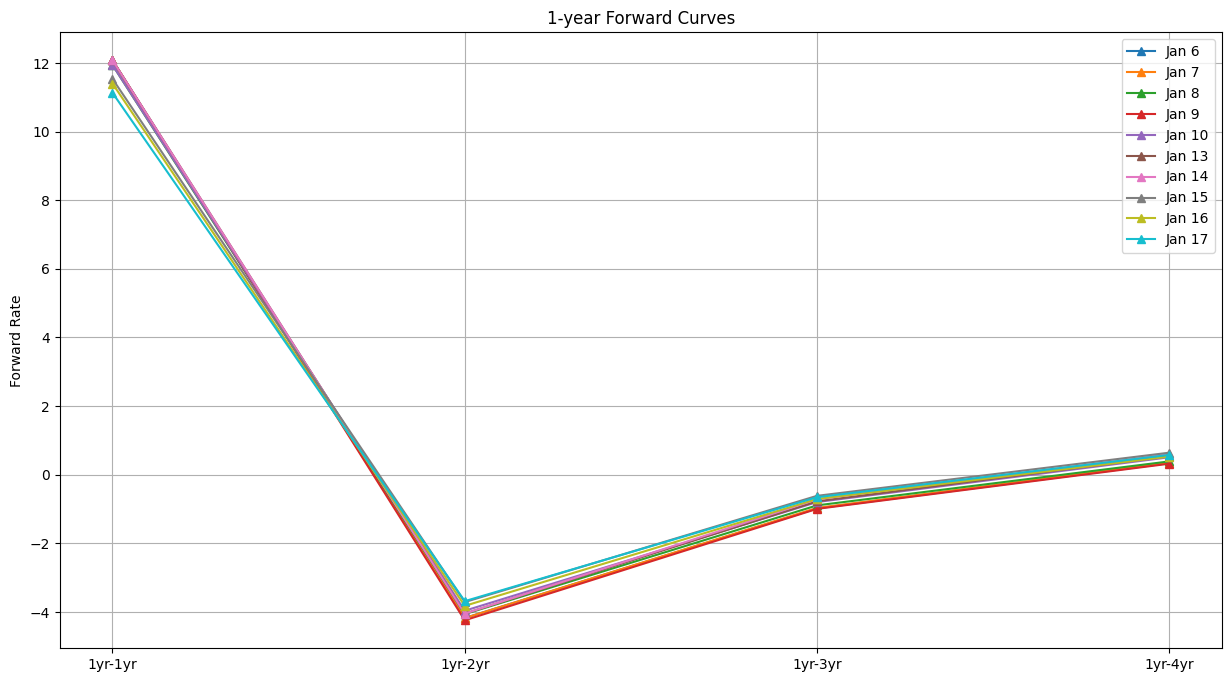

In [ ]:
selected_bonds = [
    "CAN 1.25 Mar 25",
    "CAN 0.5 Sep 25",
    "CAN 0.25 Mar 26",
    "CAN 1.0 Sep 26",
    "CAN 1.25 Mar 27",
    "CAN 2.75 Sep 27",
    "CAN 3.25 Sep 28",
    "CAN 4.0 Mar 29",
    "CAN 3.5 Mar 28",
    "CAN 3.5 Sep 29"
]

# Extract the selected bonds from bonds_spot.
bonds_forwards = bonds_spot.loc[selected_bonds].copy()
print("Initial bonds_forwards:")
print(bonds_forwards)

# --------------------------------------------------------------------
# Step 2. Extract the first 4 rows to compute forward rates.
#         We assume:
#         - Row 0: 1-year spot rate (i.e., forward rate for 1yr-1yr is the 1-year spot rate)
#         - Row 1: 2-year spot rate (to derive 1yr-2yr forward rate)
#         - Row 2: 3-year spot rate (to derive 1yr-3yr forward rate)
#         - Row 3: 4-year spot rate (to derive 1yr-4yr forward rate)
# --------------------------------------------------------------------
forward_df = bonds_forwards.iloc[0:4, :].copy()

# --------------------------------------------------------------------
# Step 3. For each trading day (each column in the DataFrame), compute the forward rates.
#         Ensure that the spot rates are positive (using abs) before applying the formula.
#
#         For a given trading day:
#           - Let S₁ be the 1-year spot rate (row 0).
#           - For each subsequent row i (i = 1, 2, 3), assume its maturity is t₂ = i+1 years.
#             Then compute the 1-year forward rate from time 1 to time t₂ as:
#
#             F₁,t₂ = [ ((1 + S_{t₂}/100)^(2*t₂) / (1 + S₁/100)^(2))^(1/(2*(t₂-1))) - 1 ] * 100
#
#         The result replaces the original spot rate in forward_df.
# --------------------------------------------------------------------
for d in range(len(dates)):
    # For the current trading day (column), take the absolute value of the spot rates.
    S1 = abs(forward_df.iloc[0, d])  # 1-year spot rate (row 0)
    # Row 0 remains unchanged because 1yr-1yr forward rate equals the 1-year spot rate.
    for i in range(1, 4):  # For rows 1, 2, and 3 (representing 2, 3, and 4-year maturities)
        t2 = i + 1         # Assumed maturity in years: 2, 3, or 4 years
        S_t2 = abs(forward_df.iloc[i, d])

        # Compute the 1-year forward rate from time 1 to time t₂ using semiannual compounding:
        forward_rate = (((1 + S_t2/100)**(2*t2)) / ((1 + S1/100)**2))**(1/(2*(t2 - 1))) - 1
        forward_rate = forward_rate * 100  # Convert to percentage

        # Update the value in the DataFrame
        forward_df.iloc[i, d] = forward_rate

# --------------------------------------------------------------------
# Step 4. Plot the forward curves using the provided plotting snippet.
#
#         The x-axis is labeled with 4 points: ['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr']
#         corresponding to the four rows in forward_df.
# --------------------------------------------------------------------
plt.figure(figsize=(15,8))

for i in range(len(dates)):
    plt.plot(forward_df.iloc[:, i].values, label=dates[i], marker='^')

plt.title('1-year Forward Curves')
plt.ylabel('Forward Rate')
plt.xticks(np.arange(4), ['1yr-1yr','1yr-2yr','1yr-3yr','1yr-4yr'])
plt.grid()
plt.legend()
plt.show();

In [2]:
import numpy as np
import pandas as pd

# --- Sample data definitions (only needed if you haven't already defined these DataFrames) ---
# Sample data for bonds_ytm (yields for 10 bonds over several days)
data_ytm = {
    'Jan 6': [99.73, 98.4, 96.99, 97.01, 96.62, 99.63, 101.1, 104.07, 101.82, 102.22],
    'Jan 7': [99.73, 98.4, 96.98, 96.99, 96.59, 99.56, 101.14, 104.01, 101.82, 102.14],
    'Jan 8': [99.74, 98.4, 96.97, 97.00, 96.58, 99.54, 100.99, 103.9, 101.7, 102.04],
    'Jan 9': [99.73, 98.42, 97.00, 97.03, 96.63, 99.58, 100.94, 103.87, 101.72, 101.98],
    'Jan 10': [99.74, 98.37, 96.90, 96.86, 96.39, 99.27, 100.79, 103.53, 101.52, 101.69]
}
bonds_ytm = pd.DataFrame(data_ytm)

# Sample data for bonds_forwards (forward rates for 4 forward rate instruments over several days)
data_forwards = {
    'Day1': [1.0, 1.1, 1.2, 1.3],
    'Day2': [1.05, 1.15, 1.25, 1.35],
    'Day3': [1.1, 1.2, 1.3, 1.4],
    'Day4': [1.15, 1.25, 1.35, 1.45],
    'Day5': [1.2, 1.3, 1.4, 1.5]
}
bonds_forwards = pd.DataFrame(data_forwards)

# --- End of sample data definitions ---

# A small epsilon value to avoid log(0) issues
eps = 1e-10

# ------------------------------
# 1. Calculate the daily log-returns of yield and their covariance matrix
# ------------------------------

# Reverse the column order in bonds_ytm to ensure the time series are in the correct order (from earliest to latest)
bonds_ytm_arr = bonds_ytm.iloc[:, ::-1].to_numpy()

# Calculate log-returns: Xi,j = log((r_{i,j+1} + eps) / (r_{i,j} + eps))
bonds_ytmR_arr = np.log((bonds_ytm_arr[:, 1:] + eps) / (bonds_ytm_arr[:, :-1] + eps))
print("All bonds daily log-returns (yield):")
print(bonds_ytmR_arr)

# According to the problem requirement, select 5 bonds (here, we choose the bonds at indices 0, 2, 4, 6, 8)
bonds_ytmR_arr = bonds_ytmR_arr[[0, 2, 4, 6, 8], :]
print("Selected 5 bonds daily log-returns (yield):")
print(bonds_ytmR_arr)

# Compute the covariance matrix of the log-returns of yields
bonds_ytmR_cov = np.cov(bonds_ytmR_arr)
print("Covariance matrix of yield log-returns:")
print(bonds_ytmR_cov)

# ------------------------------
# 2. Calculate the daily log-returns of forward rates and their covariance matrix
# ------------------------------

# Reverse the column order in bonds_forwards to ensure the time series are arranged from earliest to latest.
bonds_forwards_arr = bonds_forwards.iloc[:, ::-1].to_numpy()

# Convert the data to a float array (using vstack to ensure the correct shape)
bonds_forwards_arr = np.vstack(bonds_forwards_arr[:, :]).astype(float)
print("Forward rates array:")
print(bonds_forwards_arr)

# Calculate the log-returns of forward rates: log((f_{j+1} + eps) / (f_j + eps))
forwardsReturns_arr = np.log((bonds_forwards_arr[:, 1:] + eps) / (bonds_forwards_arr[:, :-1] + eps))
print("Daily log-returns of forward rates:")
print(forwardsReturns_arr)

# Compute the covariance matrix of the log-returns of forward rates
forwardsReturns_cov = np.cov(forwardsReturns_arr)
print("Covariance matrix of forward rates log-returns:")
print(forwardsReturns_cov)



All bonds daily log-returns (yield):
[[-0.00010027  0.00010027 -0.00010027  0.        ]
 [ 0.00050816 -0.00020323  0.          0.        ]
 [ 0.00103146 -0.00030933  0.00010312  0.00010311]
 [ 0.00175357 -0.00030923 -0.0001031   0.00020619]
 [ 0.00248679 -0.00051757  0.00010354  0.00031054]
 [ 0.00311793 -0.00040177  0.0002009   0.00070285]
 [ 0.00148714  0.00049522  0.00148419 -0.00039557]
 [ 0.00327869  0.00028878  0.00105815  0.0005767 ]
 [ 0.00196812 -0.00019664  0.00117925  0.        ]
 [ 0.00284775  0.00058818  0.00097953  0.00078293]]
Selected 5 bonds daily log-returns (yield):
[[-0.00010027  0.00010027 -0.00010027  0.        ]
 [ 0.00103146 -0.00030933  0.00010312  0.00010311]
 [ 0.00248679 -0.00051757  0.00010354  0.00031054]
 [ 0.00148714  0.00049522  0.00148419 -0.00039557]
 [ 0.00196812 -0.00019664  0.00117925  0.        ]]
Covariance matrix of yield log-returns:
[[ 9.21544382e-09 -4.05011540e-08 -8.39582626e-08 -5.70967604e-08
  -8.71081299e-08]
 [-4.05011540e-08  3.217976

In [4]:
ytmR_eigenvalues, ytmR_eigenvectors = np.linalg.eig(bonds_ytmR_cov)
print('Eigenvalues of daily log-returns of yield:')
print(ytmR_eigenvalues)
print('Eigenvectors of daily log-returns of yield:')
print(ytmR_eigenvectors)

# Calculate eigenvalues and eigenvectors for the covariance matrix of daily log-returns of forward rates.
# (The same methodology applies to the forward rates, which are calculated using the same log-return formula.)
forwardsReturns_eigenvalues, forwardsReturns_eigenvectors = np.linalg.eig(forwardsReturns_cov)
print('Eigenvalues of daily log-returns of forward rates:')
print(forwardsReturns_eigenvalues)
print('Eigenvectors of daily log-returns of forward rates:')
print(forwardsReturns_eigenvectors)

Eigenvalues of daily log-returns of yield:
[ 3.23537554e-06  6.39320962e-07  3.08517217e-08 -7.72671699e-23
  7.46436087e-24]
Eigenvectors of daily log-returns of yield:
[[-0.04296971 -0.02237061 -0.30773663  0.52843075 -0.81297945]
 [ 0.30310312 -0.19421036  0.12011537 -0.74119141 -0.51943491]
 [ 0.68563568 -0.54175535 -0.3805253   0.17754853  0.23678402]
 [ 0.36485559  0.77228085 -0.49206598 -0.1633242   0.04811926]
 [ 0.5505145   0.26807709  0.70988874  0.33644906 -0.10425757]]
Eigenvalues of daily log-returns of forward rates:
[ 1.86723431e-05  1.91581914e-10 -2.34016936e-22  6.86089428e-16]
Eigenvectors of daily log-returns of forward rates:
[[-0.6207371   0.66639288 -0.12865211  0.39249795]
 [-0.52112733  0.00595118  0.5472859  -0.65488104]
 [-0.44372633 -0.39346549 -0.75452658 -0.28103633]
 [-0.38238555 -0.6333009   0.33855047  0.58145917]]


The fact that some eigenvalues are 0 indicates that the covariance matrix is singular (i.e., it has reduced rank), which usually happens when there is redundancy or perfect collinearity among the yield log-return time series.